# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

# Load and Preprocess Data

## Load Preprocessed Features and Targets

In [2]:
X = pd.read_csv("/content/X_preprocessed.csv")
y = pd.read_csv("/content/y_preprocessed.csv").values.ravel()

## Split Data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM

## Initial SVM

### Initial SVM Training and Prediction

In [4]:
# Train SVM with basic parameters
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [5]:
# Initial Predictions
y_pred = svm_model.predict(X_test)

### Initial SVM Evaluatuion

In [6]:
# Performance
print("Initial SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Initial SVM Performance:
Accuracy: 0.9343
Precision: 0.9448
Recall: 0.9356


In [7]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       579
           1       0.94      0.94      0.94       714

    accuracy                           0.93      1293
   macro avg       0.93      0.93      0.93      1293
weighted avg       0.93      0.93      0.93      1293



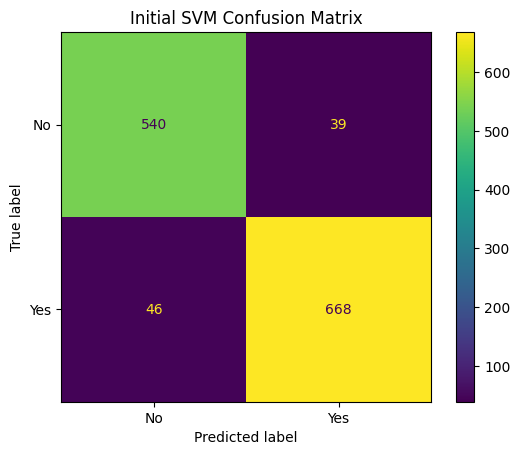

In [8]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["No", "Yes"]).plot()
plt.title("Initial SVM Confusion Matrix")
plt.show()

## Tuned SVM

### Hyperparameter Tuning

In [9]:
# Use `GridSearchCV` to optimize `C`, `Gamma`, and `kernel`
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

In [10]:
# Grid Search
grid_search = GridSearchCV(SVC(random_state=42, class_weight="balanced"), param_grid, cv=2)

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

### Best Model

In [12]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

### Tuned SVM Performance Evaluation

In [13]:
# Performance
print("\nTuned SVM Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Tuned SVM Performance:
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9476
Test Accuracy: 0.9482


In [14]:
# Classification Report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       579
           1       0.96      0.95      0.95       714

    accuracy                           0.95      1293
   macro avg       0.95      0.95      0.95      1293
weighted avg       0.95      0.95      0.95      1293



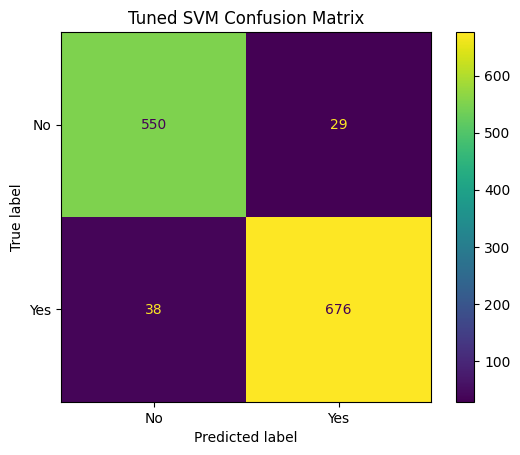

In [15]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best), display_labels=["No", "Yes"]).plot()
plt.title("Tuned SVM Confusion Matrix")
plt.show()

## ROC Curve

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)

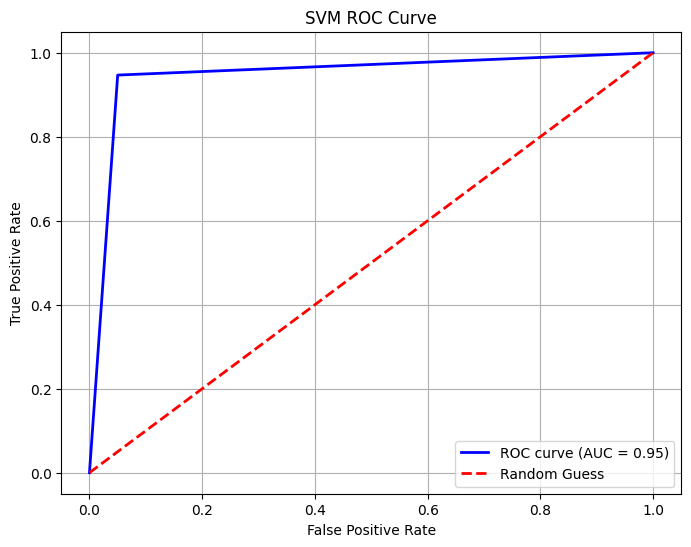

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()